# Business Case: Aerofit

## Introduction

### Objective:

 AeroFit wants to identify the characteristics of the target audience for each type of treadmill (KP281, KP481, KP781) offered by the company, to provide a better recommendation of the treadmills to the new customers.

 This notebook covers:

 1. Descriptive Statistics
 2. Univariate/Bivariate and Multivariate Analysis
 3. Marginal/Conditional Probability
 4. Recommendations

### Dataset Details
Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

## Basic Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv('aerofit_treadmill.csv')

In [3]:
df1.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df1.shape

(180, 9)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df1.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df1.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [8]:
print(df1[['Product']].value_counts())
print()
print(df1[['Gender']].value_counts())
print()
print(df1[['MaritalStatus']].value_counts())
print()
print(df1[['Usage']].value_counts())
print()
print(df1[['Fitness']].value_counts())

Product
KP281      80
KP481      60
KP781      40
Name: count, dtype: int64

Gender
Male      104
Female     76
Name: count, dtype: int64

MaritalStatus
Partnered        107
Single            73
Name: count, dtype: int64

Usage
3        69
4        52
2        33
5        17
6         7
7         2
Name: count, dtype: int64

Fitness
3          97
5          31
2          26
4          24
1           2
Name: count, dtype: int64


### Observations:

* There are 180 rows and 9 columns.
* There are no null values in the dataset.
* Product, Gender and Marital Status are nominal categorical columns.
* Usage and Fitness can be classified as ordinal categorical columns.
* Rest are numerical columns.
* There are three types of products and fitness is divided into five levels.
* Age is between 18 and 50 with mean being 28 and median 26.
* Education is between 12 to 21 years where mean education being 16 years and 75% of people have education less than or equal to 16 years.



## Detecting Outliers

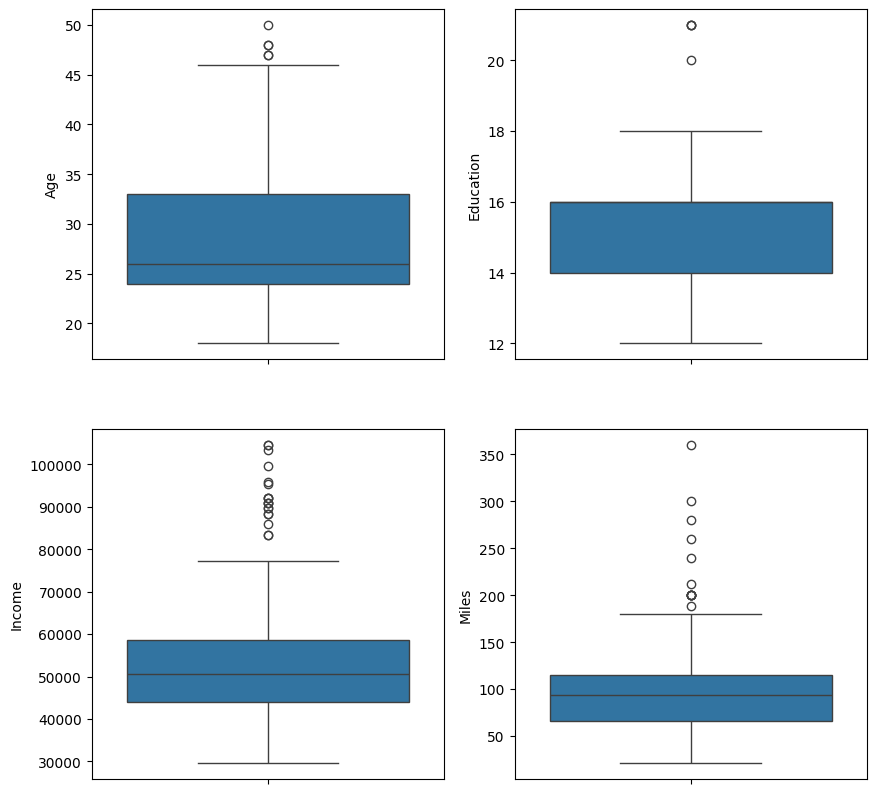

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(data=df1, y='Age', ax=axes[0,0])
sns.boxplot(data=df1, y='Education', ax=axes[0,1])
sns.boxplot(data=df1, y='Income', ax=axes[1,0])
sns.boxplot(data=df1, y='Miles', ax=axes[1,1])

plt.show()

In [95]:
print(f'Difference between mean and median in Age: {df1['Age'].median() - df1['Age'].mean()}')
print(f'Difference between mean and median in Education: {df1['Education'].median() - df1['Education'].mean()}')
print(f'Difference between mean and median in Income: {df1['Income'].median() - df1['Income'].mean()}')
print(f'Difference between mean and median in Miles: {df1['Miles'].median() - df1['Miles'].mean()}')

Difference between mean and median in Age: -2.788888888888888
Difference between mean and median in Education: 0.42777777777777715
Difference between mean and median in Income: -3123.0777777777766
Difference between mean and median in Miles: -9.194444444444443


### Observations:

* Some outliers can be seen after 45 years which is derived as the cutoff point for outliers in Age.
* Some outliers in Education after 18 years of education.
* Many outliers can be seen in Income having cutoff at 80k$.
* Similarly for Miles, some outliers can be seen after 200 miles.

## Univariate Analysis

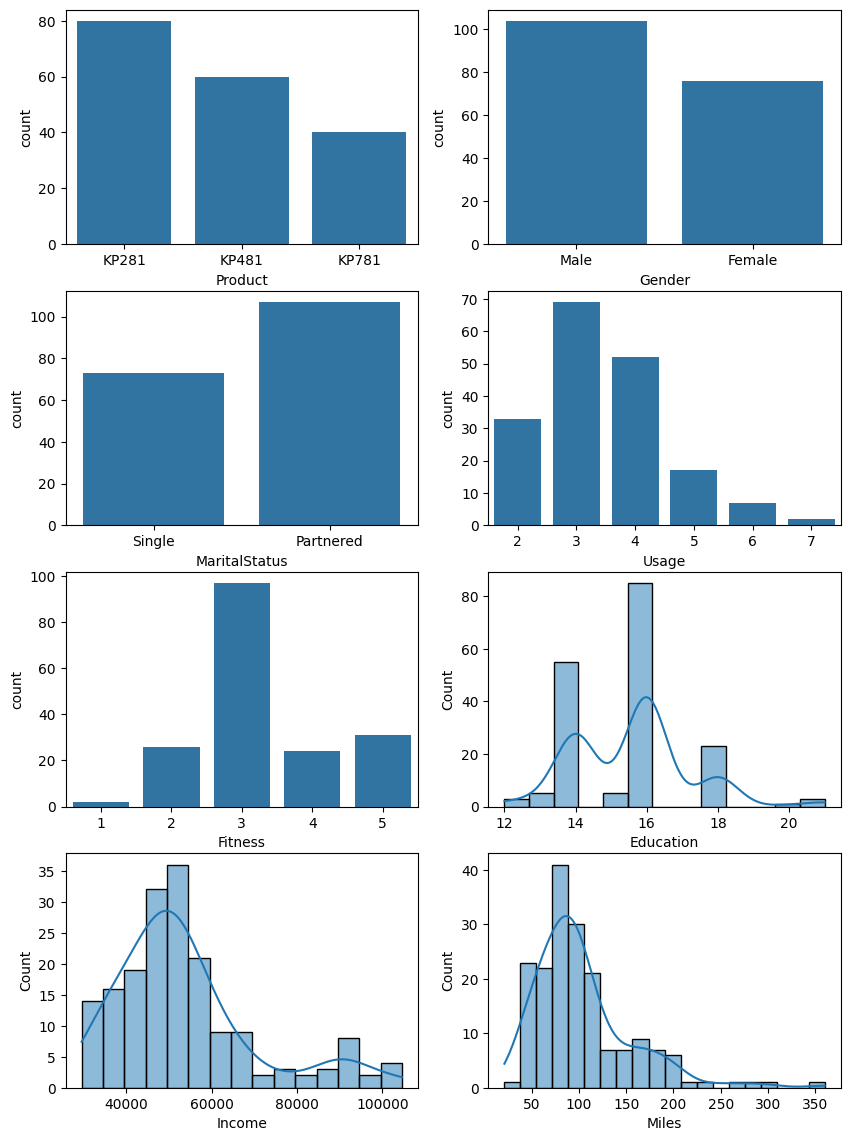

In [10]:
fig, axis = plt.subplots(nrows=4, ncols=2, figsize=(10, 14))
sns.countplot(data=df1, x='Product', ax=axis[0,0])
sns.countplot(data=df1, x='Gender', ax=axis[0,1])
sns.countplot(data=df1, x='MaritalStatus', ax=axis[1,0])
sns.countplot(data=df1, x='Usage', ax=axis[1,1])
sns.countplot(data=df1, x='Fitness', ax=axis[2,0])
sns.histplot(data=df1, x='Education', ax=axis[2,1], kde=True)
sns.histplot(data=df1, x='Income', ax=axis[3,0], kde=True)
sns.histplot(data=df1, x='Miles', ax=axis[3,1], kde=True)
plt.show()

### Observations:

* Most products are of KP281.
* There are more males than females.
* There are more partnered people than single.
* Most people use the treadmill for three times a week and have a fitness level of three.
* Most people fall within the income bracket of 40k and 60k and have an education of 16 years.
Most people run around 100 miles per week.

## Bivariate Analysis

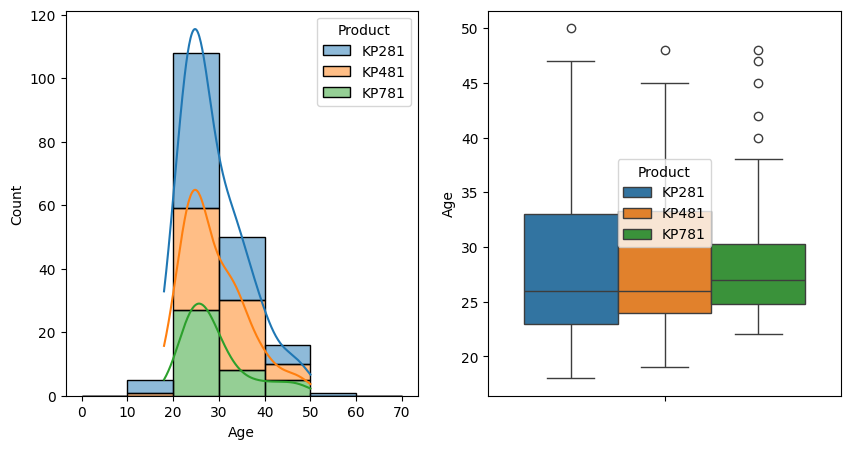

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

bins = [0, 10, 20, 30, 40, 50, 60, 70]
sns.histplot(data=df1, x='Age', bins=bins, hue='Product', multiple='stack', ax=axes[0], kde=True)
axes[0].set_xticks(bins)

sns.boxplot(data=df1, y='Age', hue='Product', ax=axes[1])

plt.show()

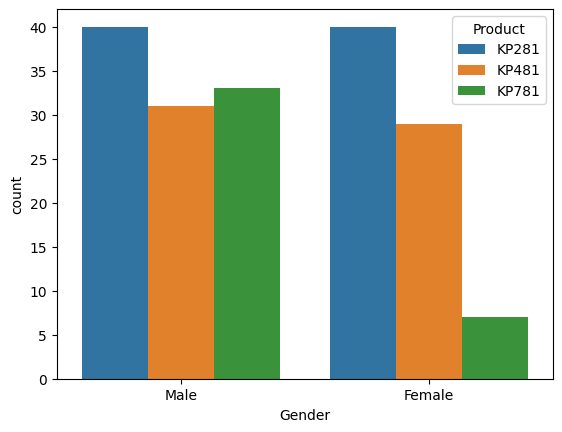

In [12]:
sns.countplot(data=df1, x='Gender', hue='Product')
plt.show()

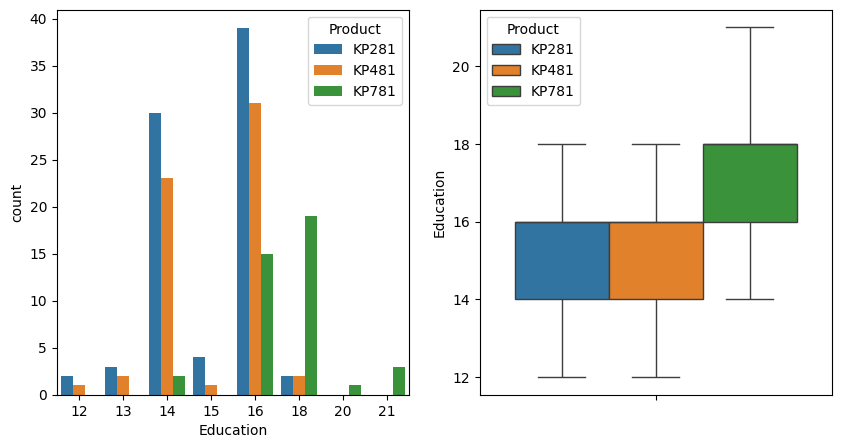

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=df1, x='Education', hue='Product', ax=axes[0])

sns.boxplot(data=df1, y='Education', hue='Product', ax=axes[1])

plt.show()

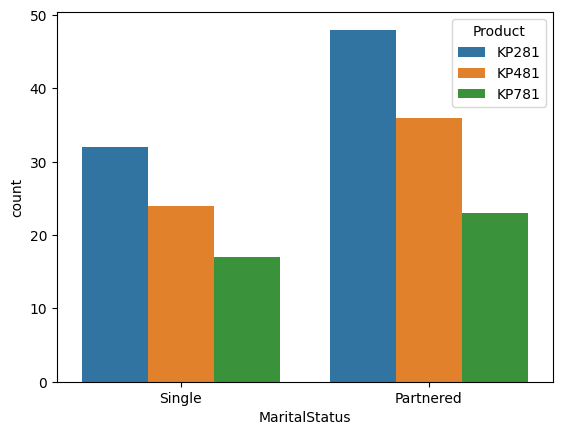

In [14]:
sns.countplot(data=df1, x='MaritalStatus', hue='Product')
plt.show()

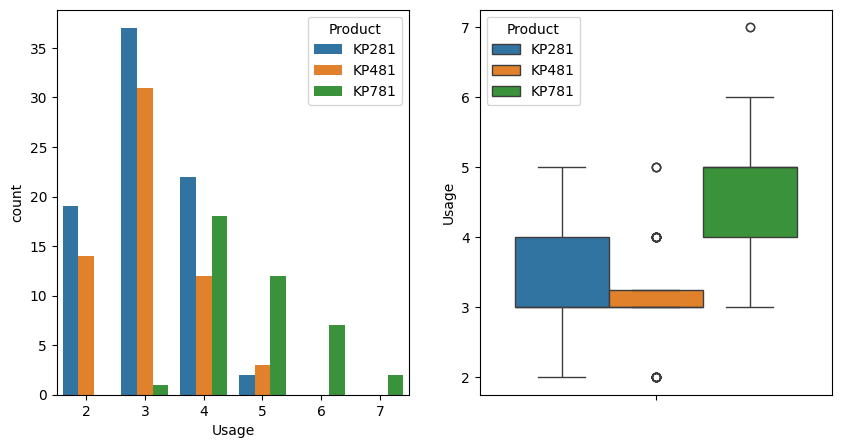

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=df1, x='Usage', hue='Product', ax=axes[0])

sns.boxplot(data=df1, y='Usage', hue='Product', ax=axes[1])

plt.show()


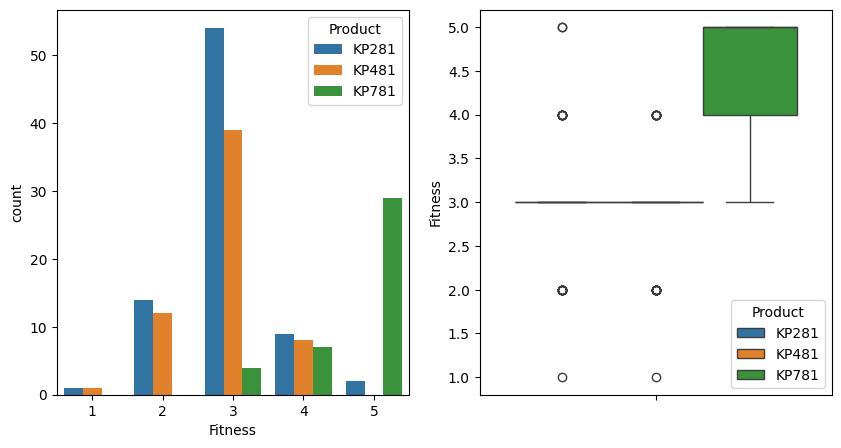

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

sns.countplot(data=df1, x='Fitness', hue='Product', ax=axes[0])

sns.boxplot(data=df1, y='Fitness', hue='Product', ax=axes[1])

plt.show()

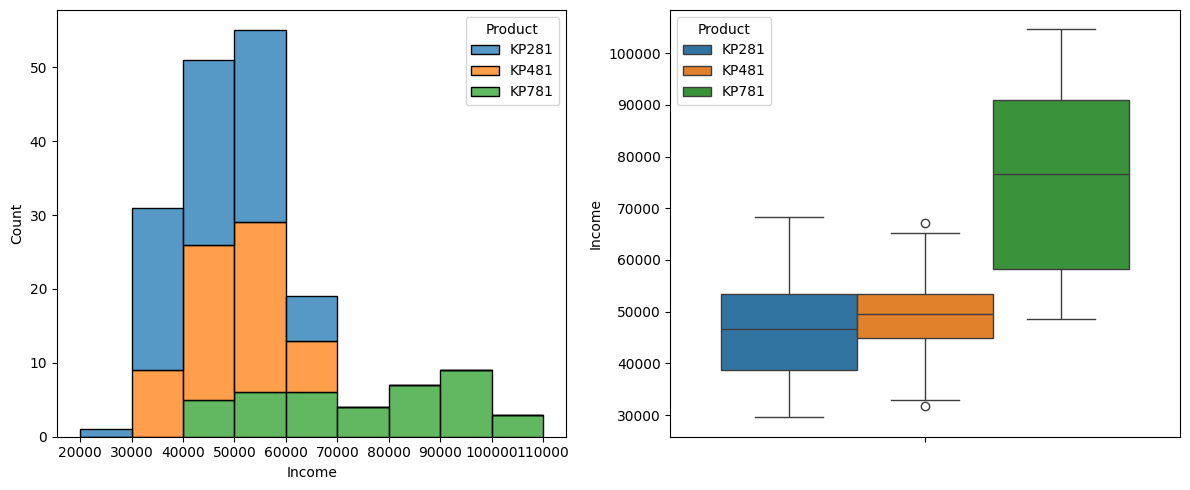

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bins = [20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000]
sns.histplot(data=df1, x='Income', bins=bins, hue='Product', multiple='stack', ax=axes[0])
axes[0].set_xticks(bins)

sns.boxplot(data=df1, y='Income', hue='Product', ax=axes[1])

plt.tight_layout()
plt.show()

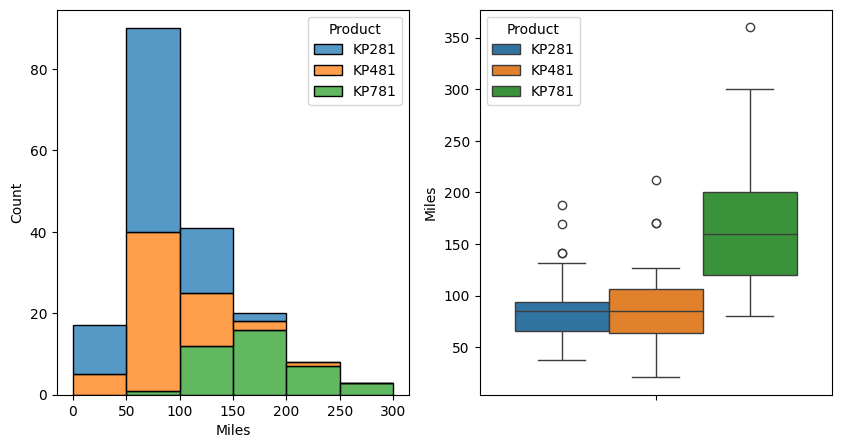

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

bins = [x for x in range(0, 350, 50)]
sns.histplot(data=df1, x='Miles', bins=bins, hue='Product', multiple='stack', ax=axes[0])
axes[0].set_xticks(bins)

sns.boxplot(data=df1, y='Miles', hue='Product', ax=axes[1])

plt.show()

### Observations:

1. Product vs Age

* KP781 is bought mostly by people of lower ages with some outliers in other age ranges.
* Most treadmills are bought by people between 20-30 years of age.

2. Gender vs Product

* KP781 is bought mostly by men.
* Other treadmills are bought in similar amounts by both Males and Females.

3. Education vs Product

* KP281 and KP481 have similar sales trend for people with less than 16 years of education.
* KP781 is being mostly by people having 16 to 18 years of education.

4. MaritalStatus vs Product

* Partnered people buy more treadmills of all types with respect to Single People.
* The order amounts is mostly as follows: KP281 > KP481 > KP781.

5. MaritalStatus vs Usage

* KP281 and KP481 are being bought by people mostly having usage of 2 to 4 days.
* KP781 is being bought by people having heavy usage of 4 or more days.

6. Product vs Fitness

* KP281 and KP481 mostly bought by people having fitness level of 3 while KP781 by people having fitness greater than 3 only.

7. Income vs Product

* KP281 bought by people having income mostly between 30k and 60k while KP481 by people between 40k to 60k income range.
* KP781 is bought by people mostly having >60k income.

8. Miles vs Product

* People having KP281 and KP481 run mostly 50 to 100 miles while people with KP781 run greater than 100 miles.

## Multivariate Analysis

In [19]:
df1.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

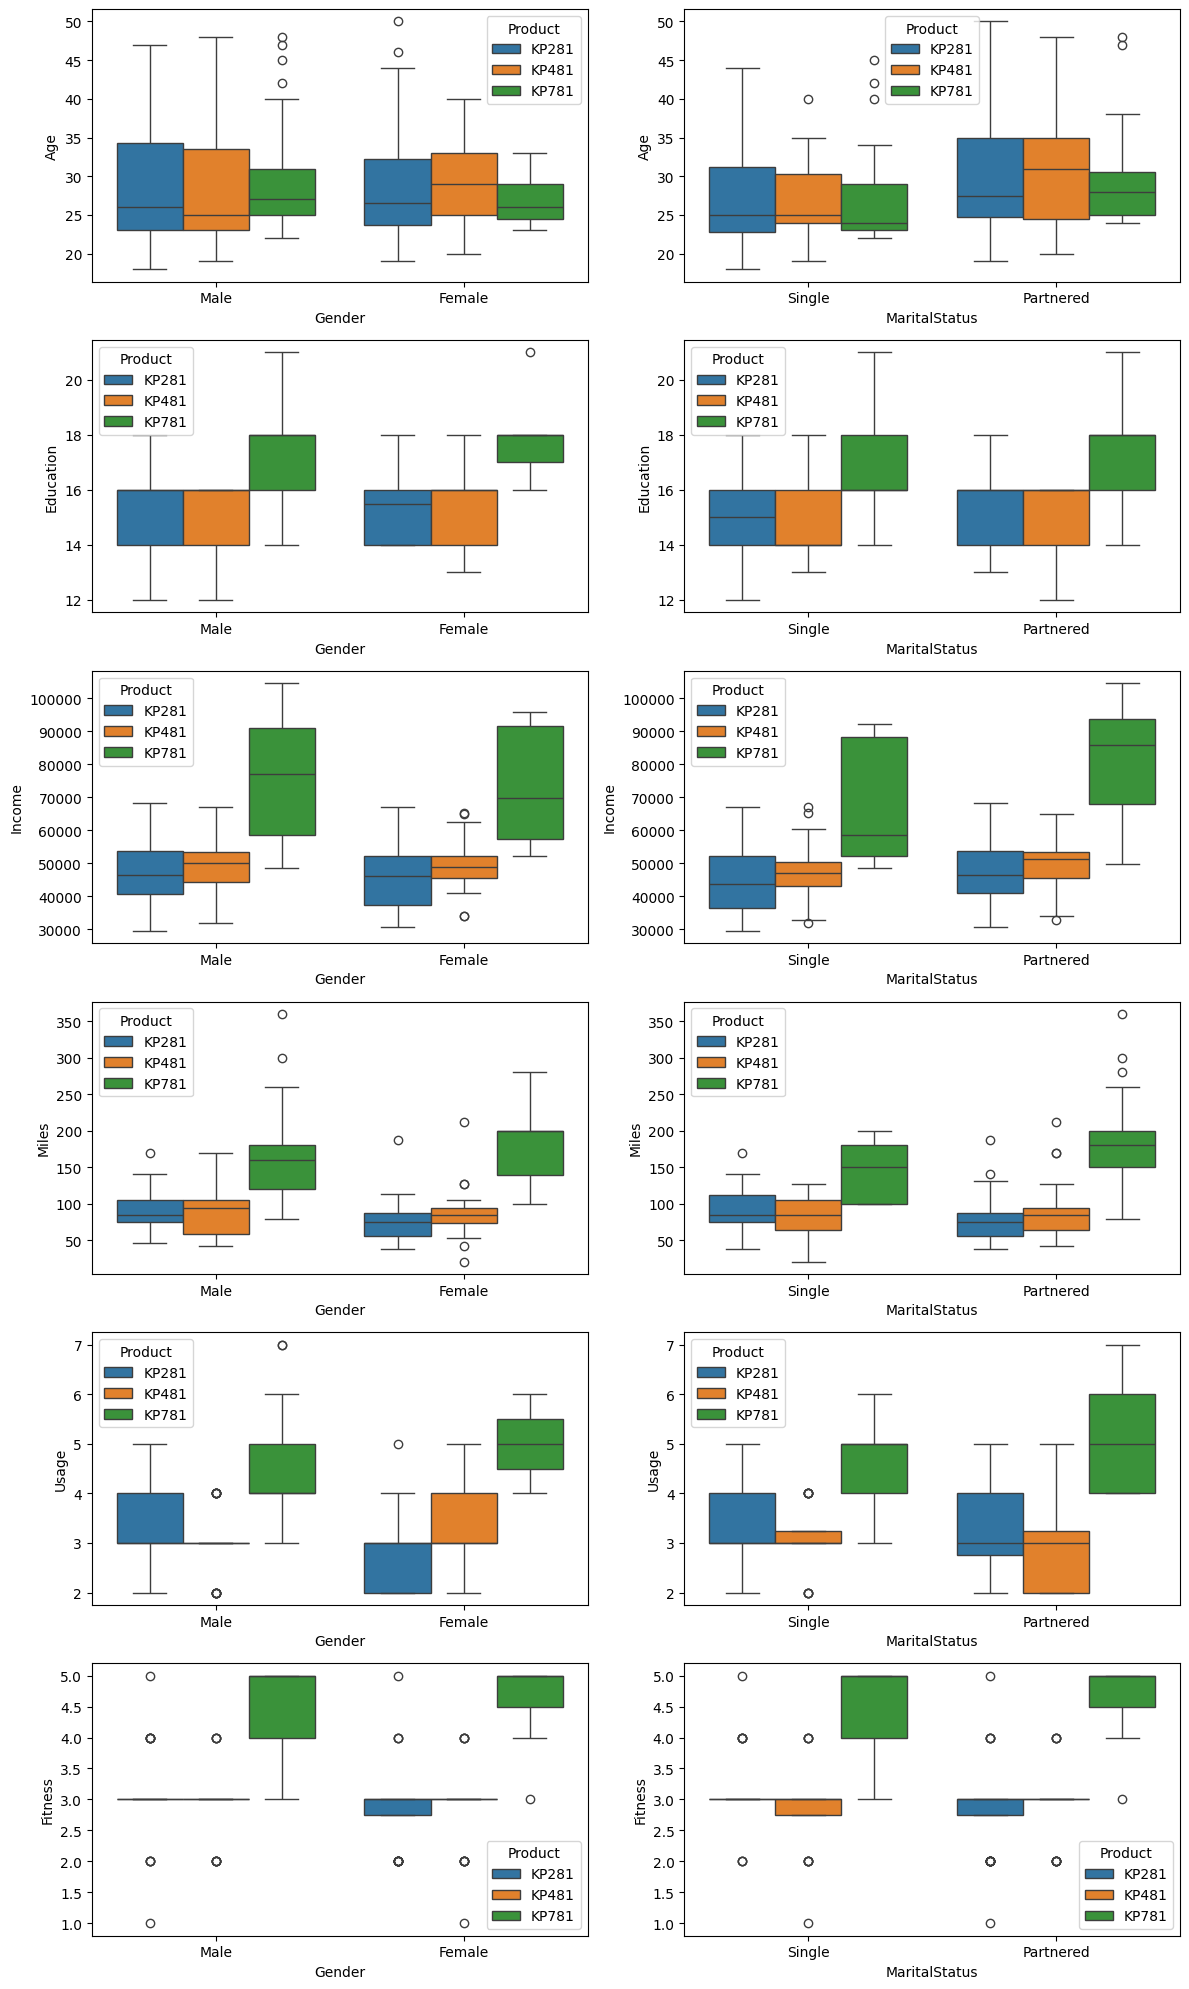

In [20]:
fig, axes = plt.subplots(6, 2, figsize=(12, 20))

core = 'Product'
cat = ['Gender', 'MaritalStatus']
cont = ['Age', 'Education', 'Income', 'Miles', 'Usage', 'Fitness']

for i in range(6):
  for j in range(2):
    sns.boxplot(data=df1, x=cat[j], y=cont[i], hue=core, ax=axes[i, j])

plt.tight_layout()
plt.show()

### Observations:

* Partnered people with usage of 2-3 days tend to buy KP481 more.

* Females with 3-4 days of usage buy KP481 more.

* Single people with fitness of 2-3 buy KP481 more while partnered with same fitness buy KP281 more.


## Marginal and Conditional Probabilities

###Marginal Probability

In [33]:
df1['Product'].value_counts(normalize=True)

,proportion
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


So, the probability of purchase of KP281, KP481, KP781 are 0.44, 0.33 and 0.22 respectively.

### Conditional Probability

In [65]:
cp1 = pd.crosstab(df1['MaritalStatus'], df1['Product'], normalize='index')
print('Marginal ->')
print()
print(f'P(Partnered): {(df1['MaritalStatus']=='Partnered').sum() / len(df1)}')
print(f'P(Single): {(df1['MaritalStatus']=='Single').sum() / len(df1)}')

print()

print('Conditional ->')
print()
for i in cp1.columns:
  for j in cp1.index:
    print(f'P({i} / {j}): {cp1.loc[j, i]}')

Marginal ->

P(Partnered): 0.5944444444444444
P(Single): 0.40555555555555556

Conditional ->

P(KP281 / Partnered): 0.4485981308411215
P(KP281 / Single): 0.4383561643835616
P(KP481 / Partnered): 0.3364485981308411
P(KP481 / Single): 0.3287671232876712
P(KP781 / Partnered): 0.21495327102803738
P(KP781 / Single): 0.2328767123287671


In [67]:
cp2 = pd.crosstab(df1['Gender'], df1['Product'], normalize='index')
print('Marginal ->')
print()
print(f'P(Female): {(df1['Gender']=='Female').sum() / len(df1)}')
print(f'P(Male): {(df1['Gender']=='Male').sum() / len(df1)}')

print()

print('Conditional ->')
print()
for i in cp2.columns:
  for j in cp2.index:
    print(f'P({i} / {j}): {cp2.loc[j, i]}')

Marginal ->

P(Female): 0.4222222222222222
P(Male): 0.5777777777777777

Conditional ->

P(KP281 / Female): 0.5263157894736842
P(KP281 / Male): 0.38461538461538464
P(KP481 / Female): 0.3815789473684211
P(KP481 / Male): 0.2980769230769231
P(KP781 / Female): 0.09210526315789473
P(KP781 / Male): 0.3173076923076923


In [69]:
cp3 = pd.crosstab(df1['Usage'], df1['Product'], normalize='index')
print('Conditional ->')
print()
for i in cp3.columns:
  for j in cp3.index:
    print(f'P({i} / {j}): {cp3.loc[j, i]}')

Conditional ->

P(KP281 / 2): 0.5757575757575758
P(KP281 / 3): 0.5362318840579711
P(KP281 / 4): 0.4230769230769231
P(KP281 / 5): 0.11764705882352941
P(KP281 / 6): 0.0
P(KP281 / 7): 0.0
P(KP481 / 2): 0.42424242424242425
P(KP481 / 3): 0.4492753623188406
P(KP481 / 4): 0.23076923076923078
P(KP481 / 5): 0.17647058823529413
P(KP481 / 6): 0.0
P(KP481 / 7): 0.0
P(KP781 / 2): 0.0
P(KP781 / 3): 0.014492753623188406
P(KP781 / 4): 0.34615384615384615
P(KP781 / 5): 0.7058823529411765
P(KP781 / 6): 1.0
P(KP781 / 7): 1.0


In [70]:
cp4 = pd.crosstab(df1['Fitness'], df1['Product'], normalize='index')
print('Conditional ->')
print()
for i in cp4.columns:
  for j in cp4.index:
    print(f'P({i} / {j}): {cp4.loc[j, i]}')

Conditional ->

P(KP281 / 1): 0.5
P(KP281 / 2): 0.5384615384615384
P(KP281 / 3): 0.5567010309278351
P(KP281 / 4): 0.375
P(KP281 / 5): 0.06451612903225806
P(KP481 / 1): 0.5
P(KP481 / 2): 0.46153846153846156
P(KP481 / 3): 0.4020618556701031
P(KP481 / 4): 0.3333333333333333
P(KP481 / 5): 0.0
P(KP781 / 1): 0.0
P(KP781 / 2): 0.0
P(KP781 / 3): 0.041237113402061855
P(KP781 / 4): 0.2916666666666667
P(KP781 / 5): 0.9354838709677419


In [76]:
df1['Age_bin'] = pd.cut(df1['Age'], bins=[17, 26, 34, 42, 50])

In [78]:
cp5 = pd.crosstab(df1['Age_bin'], df1['Product'], normalize='index')
print('Conditional ->')
print()
for i in cp5.columns:
  for j in cp5.index:
    print(f'P({i} / {j}): {cp5.loc[j, i]}')

Conditional ->

P(KP281 / (17, 26]): 0.45054945054945056
P(KP281 / (26, 34]): 0.41509433962264153
P(KP281 / (34, 42]): 0.46153846153846156
P(KP281 / (42, 50]): 0.5
P(KP481 / (17, 26]): 0.34065934065934067
P(KP481 / (26, 34]): 0.32075471698113206
P(KP481 / (34, 42]): 0.38461538461538464
P(KP481 / (42, 50]): 0.2
P(KP781 / (17, 26]): 0.2087912087912088
P(KP781 / (26, 34]): 0.2641509433962264
P(KP781 / (34, 42]): 0.15384615384615385
P(KP781 / (42, 50]): 0.3


In [81]:
df1['Education_bin'] = pd.cut(df1['Education'], bins=[11, 14, 17, 21])

In [82]:
cp6 = pd.crosstab(df1['Education_bin'], df1['Product'], normalize='index')
print('Conditional ->')
print()
for i in cp6.columns:
  for j in cp6.index:
    print(f'P({i} / {j}): {cp6.loc[j, i]}')

Conditional ->

P(KP281 / (11, 14]): 0.5555555555555556
P(KP281 / (14, 17]): 0.4777777777777778
P(KP281 / (17, 21]): 0.07407407407407407
P(KP481 / (11, 14]): 0.4126984126984127
P(KP481 / (14, 17]): 0.35555555555555557
P(KP481 / (17, 21]): 0.07407407407407407
P(KP781 / (11, 14]): 0.031746031746031744
P(KP781 / (14, 17]): 0.16666666666666666
P(KP781 / (17, 21]): 0.8518518518518519


In [84]:
df1['Income_bin'] = pd.cut(df1['Income'], bins=[20000, 40000, 60000, 80000, 110000])

In [85]:
cp7 = pd.crosstab(df1['Income_bin'], df1['Product'], normalize='index')
print('Conditional ->')
print()
for i in cp7.columns:
  for j in cp7.index:
    print(f'P({i} / {j}): {cp7.loc[j, i]}')

Conditional ->

P(KP281 / (20000, 40000]): 0.71875
P(KP281 / (40000, 60000]): 0.4811320754716981
P(KP281 / (60000, 80000]): 0.2608695652173913
P(KP281 / (80000, 110000]): 0.0
P(KP481 / (20000, 40000]): 0.28125
P(KP481 / (40000, 60000]): 0.41509433962264153
P(KP481 / (60000, 80000]): 0.30434782608695654
P(KP481 / (80000, 110000]): 0.0
P(KP781 / (20000, 40000]): 0.0
P(KP781 / (40000, 60000]): 0.10377358490566038
P(KP781 / (60000, 80000]): 0.43478260869565216
P(KP781 / (80000, 110000]): 1.0


In [87]:
df1['Miles_bin'] = pd.cut(df1['Miles'], bins=[0, 100, 200, 300, 400])

In [88]:
cp8 = pd.crosstab(df1['Miles_bin'], df1['Product'], normalize='index')
print('Conditional ->')
print()
for i in cp8.columns:
  for j in cp8.index:
    print(f'P({i} / {j}): {cp8.loc[j, i]}')

Conditional ->

P(KP281 / (0, 100]): 0.543859649122807
P(KP281 / (100, 200]): 0.3
P(KP281 / (200, 300]): 0.0
P(KP281 / (300, 400]): 0.0
P(KP481 / (0, 100]): 0.38596491228070173
P(KP481 / (100, 200]): 0.25
P(KP481 / (200, 300]): 0.2
P(KP481 / (300, 400]): 0.0
P(KP781 / (0, 100]): 0.07017543859649122
P(KP781 / (100, 200]): 0.45
P(KP781 / (200, 300]): 0.8
P(KP781 / (300, 400]): 1.0


## Correlation Analysis

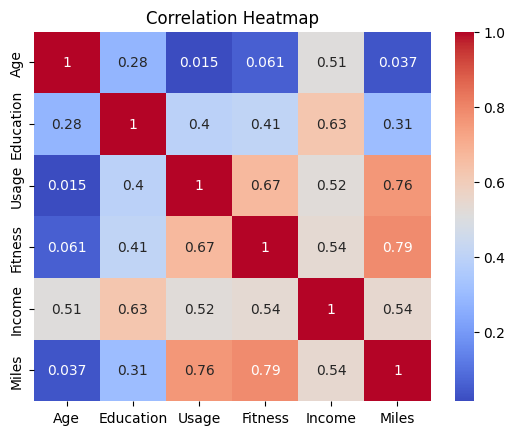

In [29]:
corr = df1.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

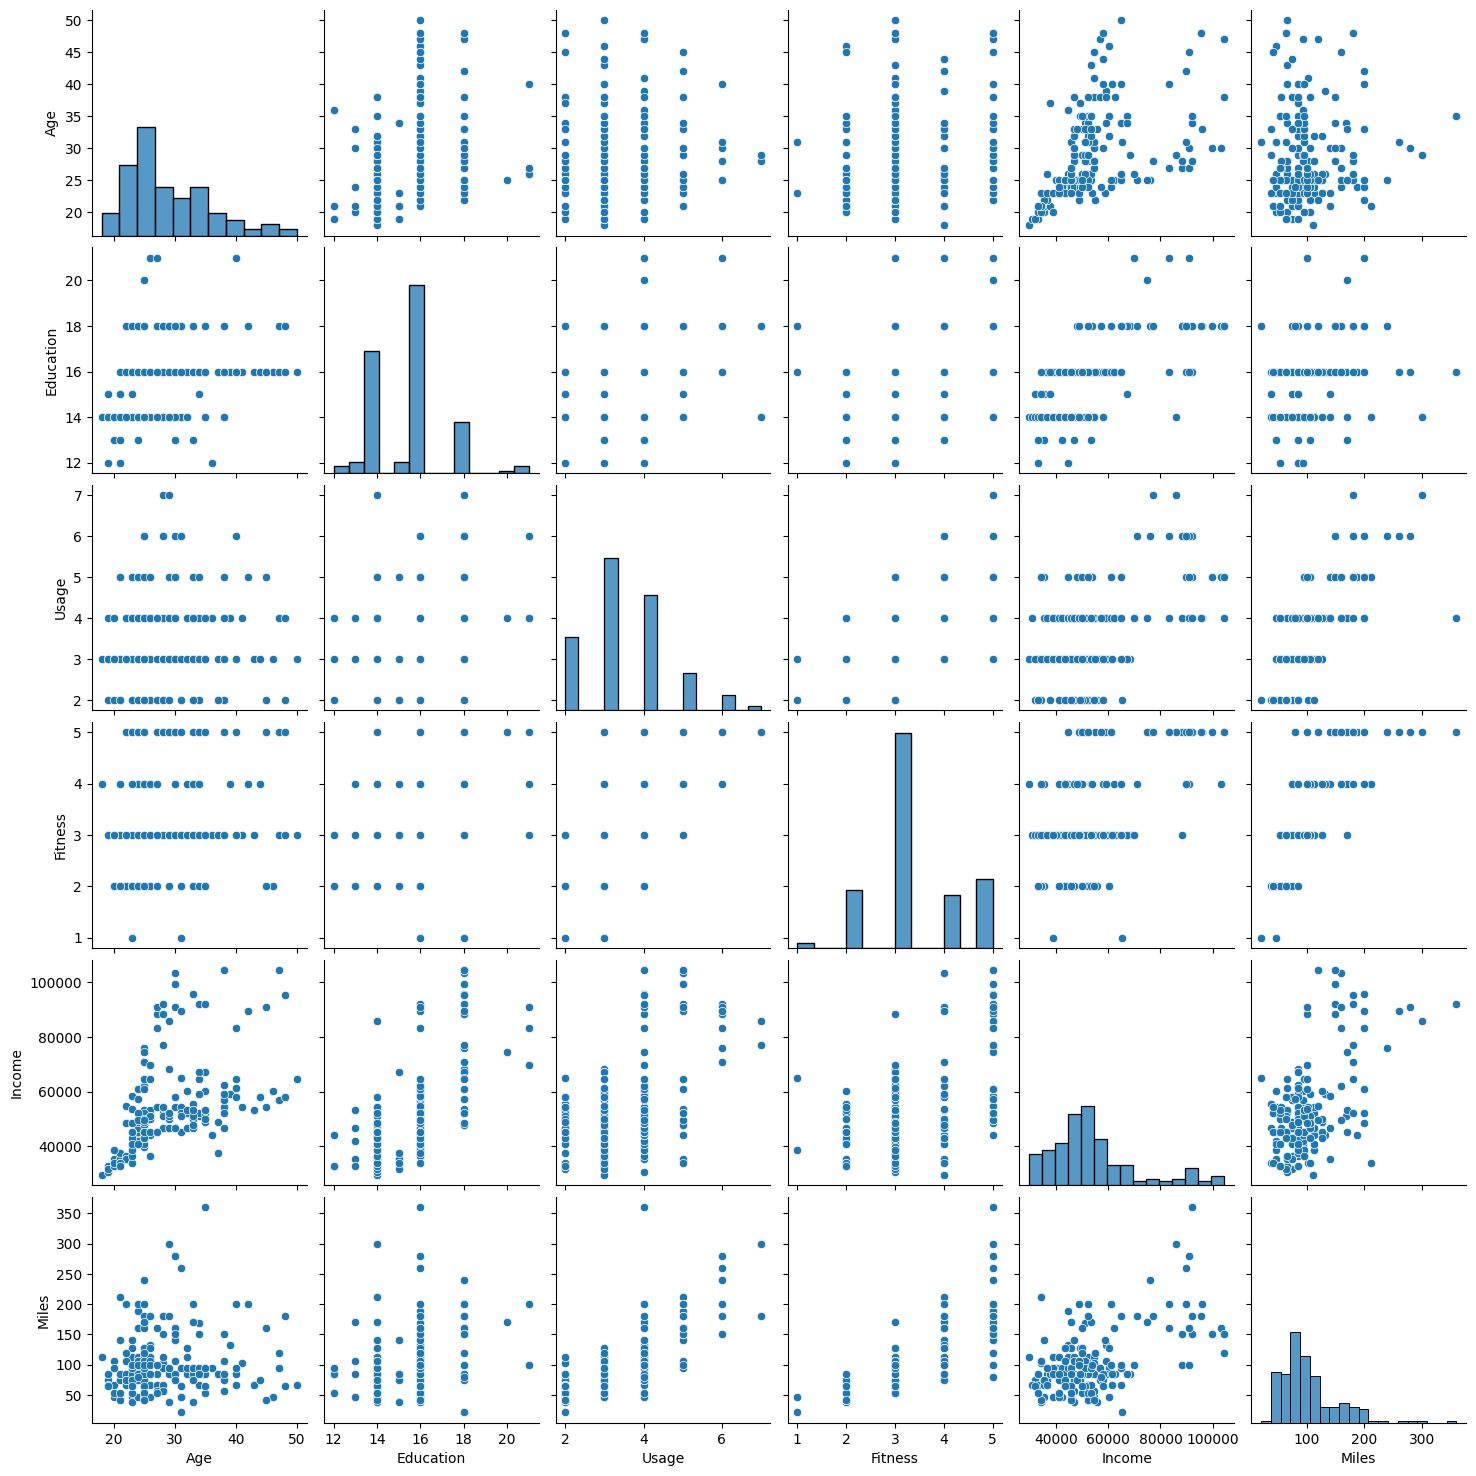

In [30]:
sns.pairplot(df1)
plt.show()

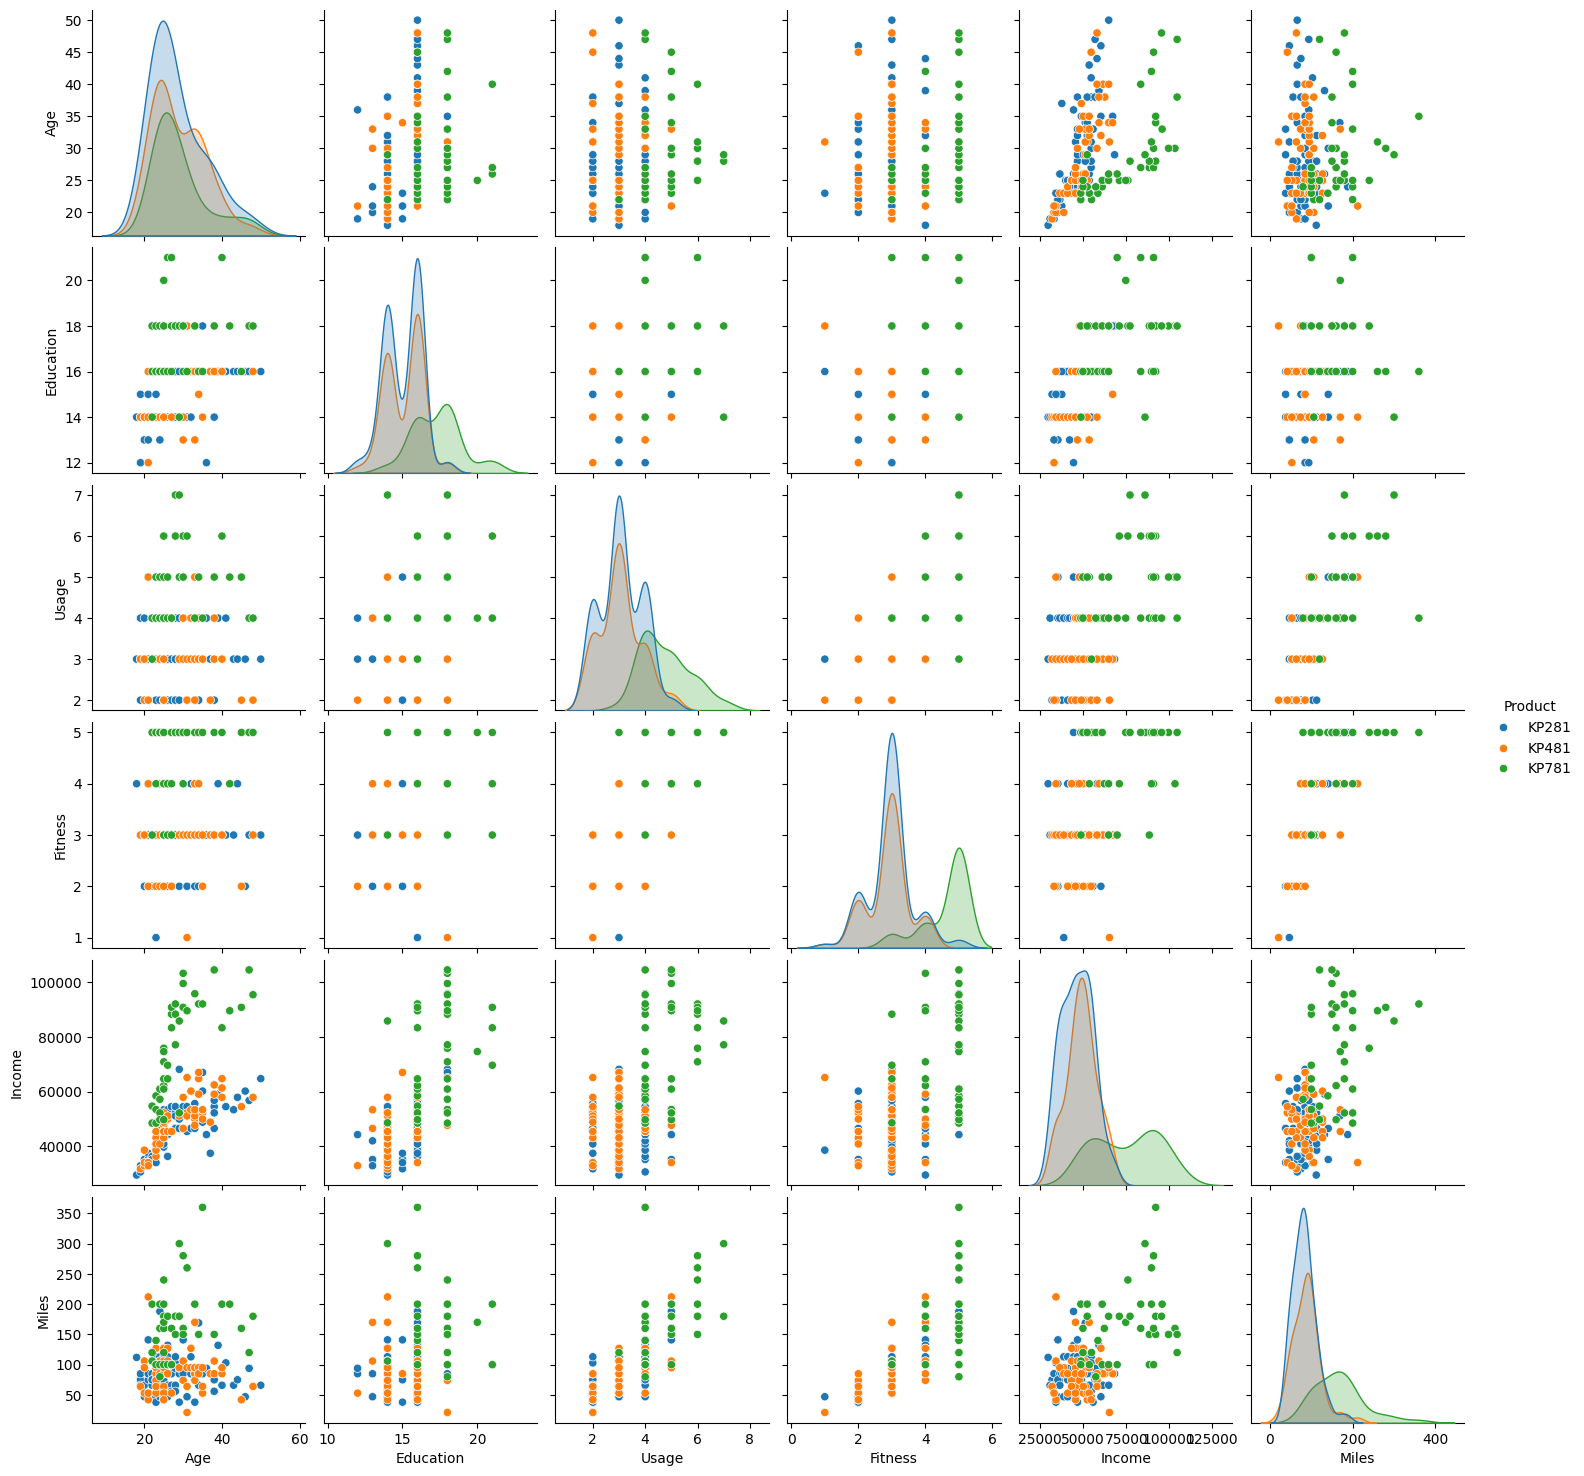

In [31]:
sns.pairplot(df1, hue='Product')
plt.show()

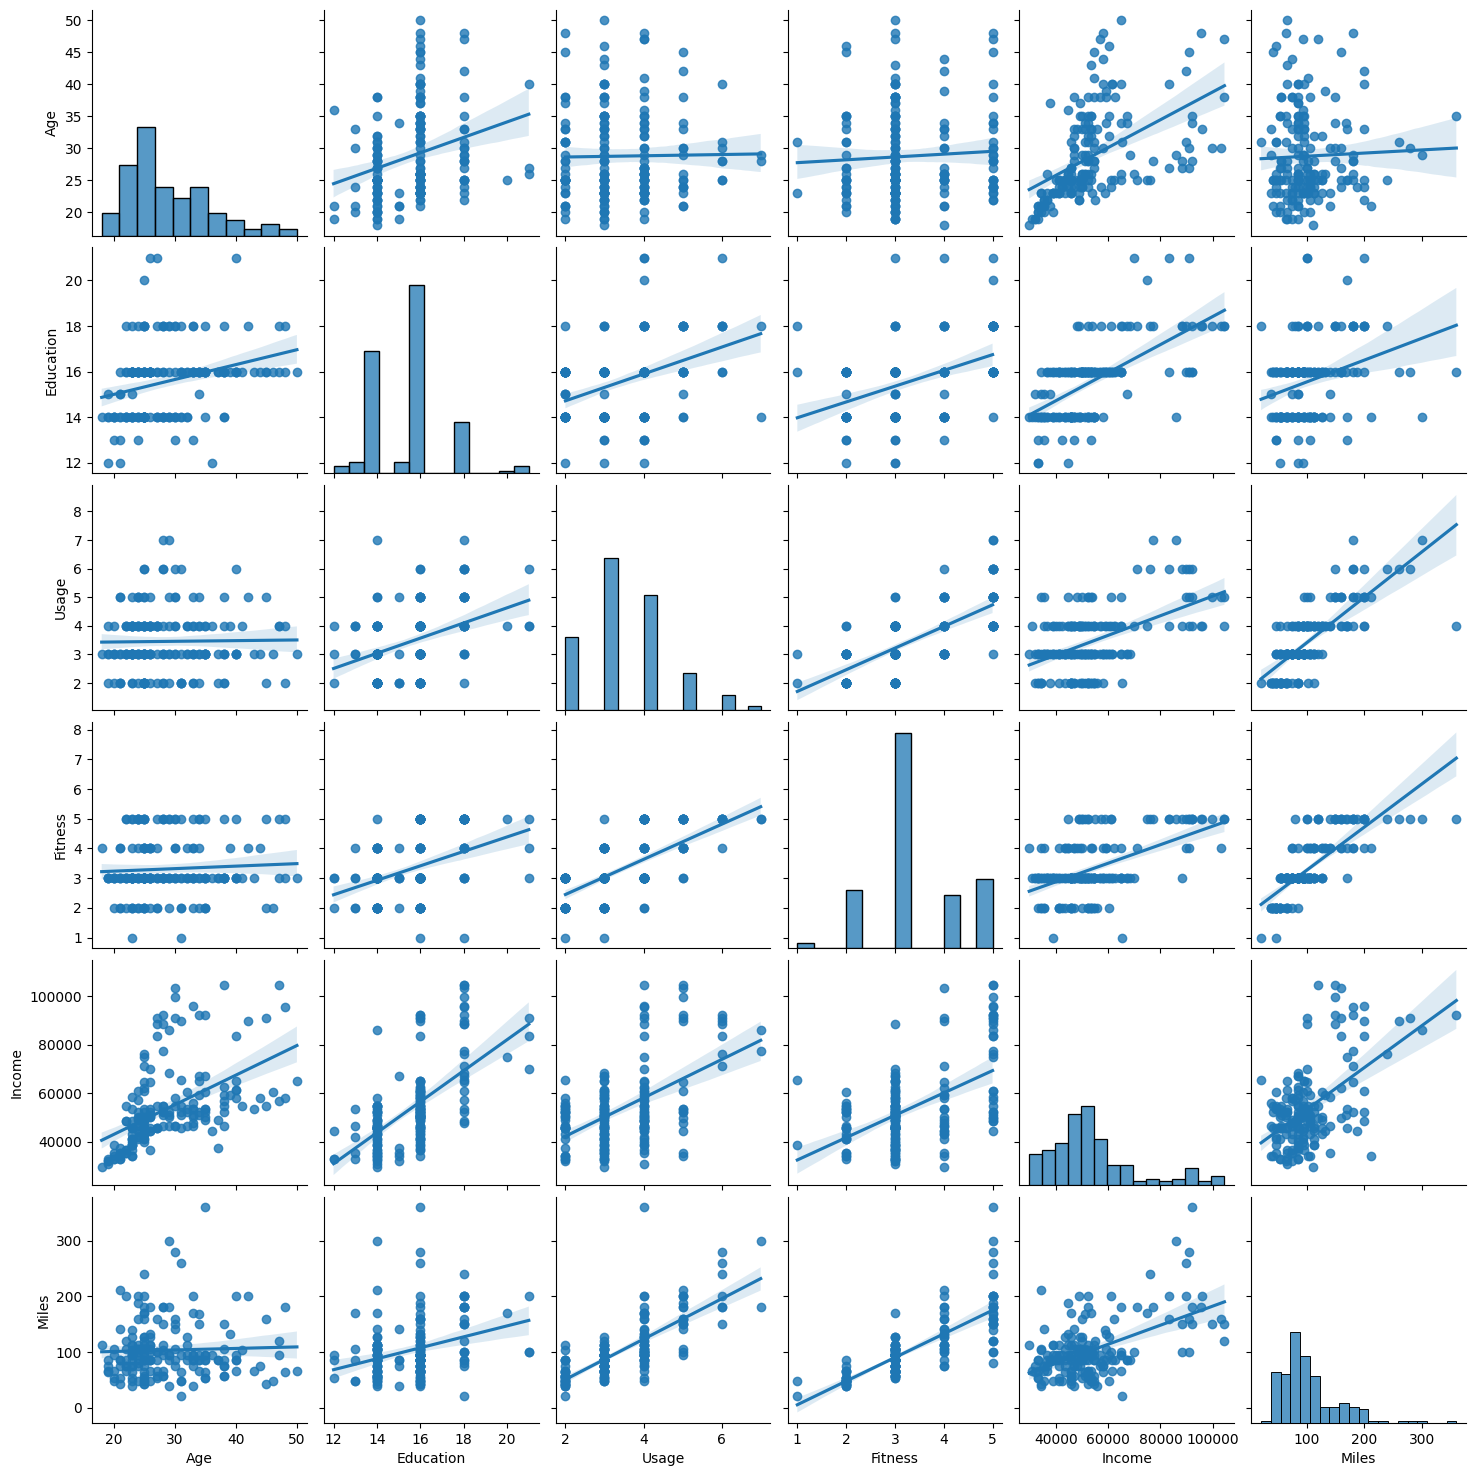

In [32]:
sns.pairplot(df1, kind='reg')

### Observations:

* It can be seen that there is a strong positive correlation between (Education-Income).

* Similarly there is a strong positive correlation between (Usage-Miles), (Usage-Fitness) and (Fitness-Miles).

## Recommendations

* KP781 is bought mostly by younger people. So, sales for KP781 can be increased by recommending it to young people more.
* Higher earning people tend to buy KP781 more. So, for these people it should be recommended. Also prices can be somewhat reduced with offers so as to gain some customers from other product.
* There is a income range 45k to 50k only where KP481 is being bought. These customers can be pushed towards KP781 and should be recommended till KP481 only rather than KP281.
* People having higher usage in days or miles buy KP781 mostly. More of such customers can be added with certain offers.
* Partnered people with usae of 3-4 days are buying KP281 more. These people can be pushed towards KP481.
* Females and Partnered people with medium fitness are mostly buying KP281. These people can be pushed towards buying KP481 or KP781.